<a href="https://colab.research.google.com/github/NicolasLopes7/predict-covid/blob/master/predictCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [17]:
covid = pd.read_csv('https://raw.githubusercontent.com/NicolasLopes7/predict-covid/master/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
covid.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country',"Deaths":"Mortes", "Confirmed":"Confirmado", "Recovered":"Recuperado"}, inplace=True)

In [19]:
mortes = covid.groupby('Date').sum()['Mortes'].reset_index()
confirmados = covid.groupby('Date').sum()['Confirmado'].reset_index()
recuperados = covid.groupby('Date').sum()['Recuperado'].reset_index()
data = pd.concat([mortes, confirmados.Confirmado, recuperados.Recuperado], ignore_index=False, axis=1)
# mortes
# mortes.tail()
data.head()

,Date,Mortes,Confirmado,Recuperado
0,01/22/2020,17.0,555.0,28.0
1,01/23/2020,18.0,653.0,30.0
2,01/24/2020,26.0,941.0,36.0
3,01/25/2020,42.0,1438.0,39.0
4,01/26/2020,56.0,2118.0,52.0


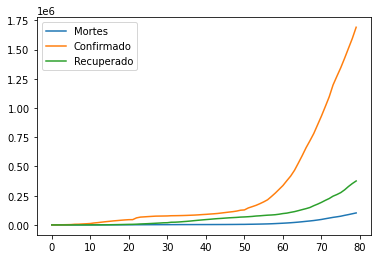

In [20]:
data.plot()

In [0]:
mortes.columns = ['ds', 'y']
confirmados.columns = ['ds', 'y']
recuperados.columns = ['ds', 'y']

confirmados['ds'] = pd.to_datetime(confirmados['ds'])
recuperados['ds'] = pd.to_datetime(recuperados['ds'])
mortes['ds'] = pd.to_datetime(mortes['ds'])

In [0]:
dias = 30

In [36]:
m = Prophet(interval_width=0.95)
c = Prophet(interval_width=0.95)
r = Prophet(interval_width=0.95)
m.fit(mortes)
c.fit(confirmados)
r.fit(recuperados)
futuroM = m.make_future_dataframe(periods=dias)
futuroC = c.make_future_dataframe(periods=dias)
futuroR = r.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
previsaoM = m.predict(futuroM)
previsaoC = c.predict(futuroC)
previsaoR = r.predict(futuroR)


In [0]:
# previsao.tail(dias)

In [0]:
# a = previsaoM[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)
# b = previsaoR[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)
# c = previsaoC[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)

# print(a)
# print(b)
# print(c)

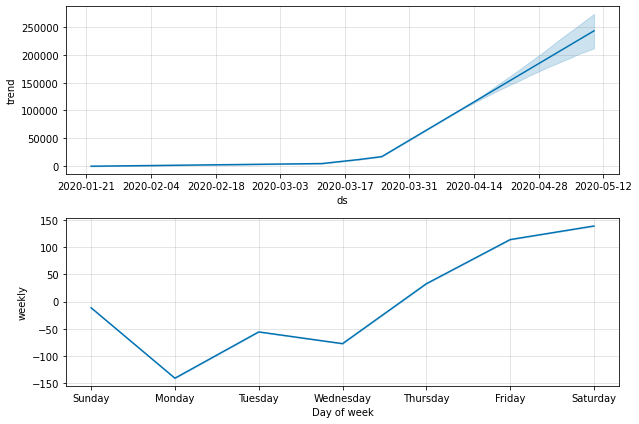

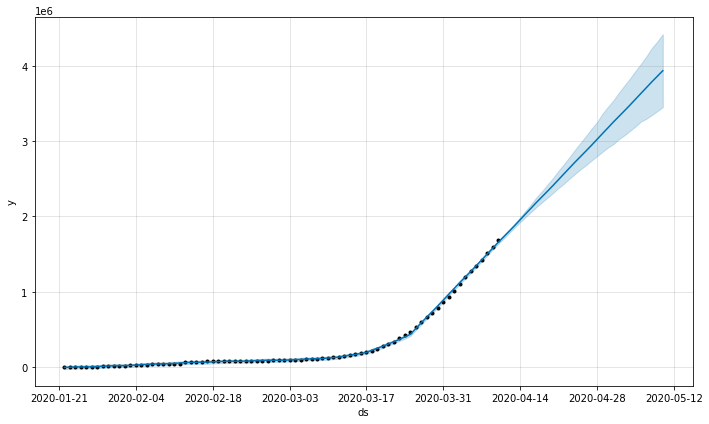

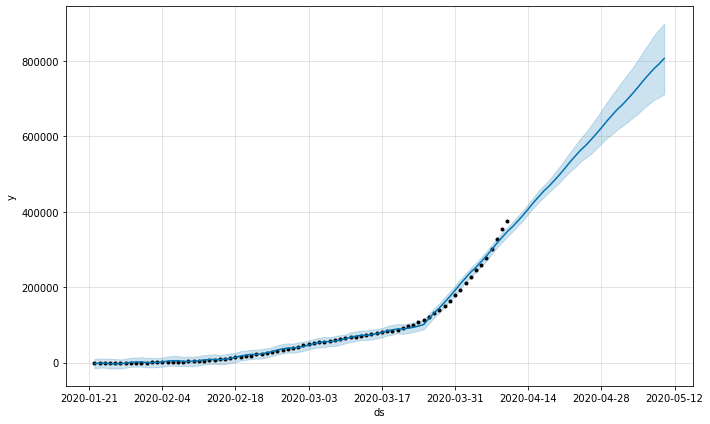

In [35]:
grafico_previsaoM = m.plot_components(previsaoM)
grafico_previsaoC = c.plot(previsaoC)
grafico_previsaoR = r.plot(previsaoR)